Llena ese carrito!
Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash. El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución. También escribe una conclusión que resuma tus hallazgos y elecciones.
1  Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

    instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.
        'order_id': número de ID que identifica de manera única cada pedido.
        'user_id': número de ID que identifica de manera única la cuenta de cada cliente.
        'order_number': el número de veces que este cliente ha hecho un pedido.
        'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).
        'order_hour_of_day': hora del día en que se hizo el pedido.
        'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.
    products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.
        'product_id': número ID que identifica de manera única cada producto.
        'product_name': nombre del producto.
        'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
        'department_id': número ID que identifica de manera única cada departamento de víveres.
    order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
        'order_id': número de ID que identifica de manera única cada pedido.
        'product_id': número ID que identifica de manera única cada producto.
        'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
        'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
    aisles.csv
        'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
        'aisle': nombre del pasillo.
    departments.csv
        'department_id': número ID que identifica de manera única cada departamento de víveres.
        'department': nombre del departamento.



Paso 1. Descripción de los datos

Lee los archivos de datos (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv y /datasets/order_products.csv) con pd.read_csv() usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.
2  Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
instacart_orders= pd.read_csv('C:/Users/mitlalocelot/sprint_4/instacart_orders(3).csv',sep=";")
products = pd.read_csv('C:/Users/mitlalocelot/sprint_4/products(1).csv',sep=";")
order_products= pd.read_csv('C:/Users/mitlalocelot/sprint_4/order_products(2).csv',sep=";")
aisles = pd.read_csv('C:/Users/mitlalocelot/sprint_4/aisles(2).csv',sep=";")
departments=pd.read_csv('C:/Users/mitlalocelot/sprint_4/departments(2).csv',sep=";")

# leer conjuntos de datos en los DataFrames

In [4]:
instacart_orders.head()
# mostrar información del DataFrame

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
products.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
order_products.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [7]:
aisles.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
departments.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

    Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
    Identifica y completa los valores ausentes.
    Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?
4  Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.


### `instacart_orders` data frame

In [9]:
duplicated_orders = instacart_orders .duplicated()
filtered_duplicated = instacart_orders[duplicated_orders]
print(filtered_duplicated)
# Revisa si hay pedidos duplicados


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? que las lineas duplicadas son el miercoles alas 3 

In [10]:
pedidos_miercoles_2am = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
print(pedidos_miercoles_2am)


# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

¿Qué sugiere este resultado?


In [11]:
# Elimina los pedidos duplicados
instacart_orders.drop_duplicates(inplace=True)

# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())


duplicado=instacart_orders[instacart_orders.duplicated(subset='order_id')].sum()
print(duplicado)# Vuelve a verificar si hay IDs duplicados de pedidos

0
order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


### `products` data frame

In [12]:
duplicated_products= products.duplicated()
filtered_products= products[duplicated_products].sum()
print(filtered_products)

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: object


In [13]:
print(products.duplicated(subset='product_id').sum())
#Verifica si hay IDs duplicadas de productos

0


In [14]:
products['product_name'] = products['product_name'].str.upper()
duplicados = products[products.duplicated(subset='product_name')]
print(duplicados)
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [15]:
# Revisa si hay nombres duplicados de productos no faltantes
products[(~products['product_name'].isna()) & products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


### `departments` data frame

In [16]:
duplicated_departments = departments.duplicated()
filtered_departments= departments[duplicated_departments].sum()
print(filtered_departments)# Revisa si hay filas totalmente duplicadas

department_id    0
department       0
dtype: object


In [17]:
print(departments.duplicated(subset='department_id'))# Revisa si hay IDs duplicadas de productos

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool


### `order_products` data frame

In [18]:
duplicated_order_products =order_products.duplicated()
filtered_order_products= order_products[duplicated_order_products].sum()
print(filtered_order_products)# Revisa si hay filas totalmente duplicadas

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


In [19]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicad=order_products.duplicated(subset=["order_id","product_id","add_to_cart_order","reordered"]).sum()
print(duplicad)


print(order_products.value_counts())

0
order_id  product_id  add_to_cart_order  reordered
3421079   30136       1.0                0            1
4         10054       5.0                1            1
          17616       10.0               1            1
          21351       6.0                1            1
          22598       7.0                1            1
                                                     ..
9         3990        14.0               1            1
          2014        4.0                1            1
          432         13.0               1            1
4         46842       1.0                0            1
          41276       13.0               1            1
Name: count, Length: 4544171, dtype: int64


Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

    La columna 'product_name' de la tabla products.
    La columna 'days_since_prior_order' de la tabla orders.
    La columna 'add_to_cart_order' de la tabla order_productos.


products data frame

In [20]:
print(products["product_name"].value_counts(dropna=False))
# Encuentra los valores ausentes en la columna 'product_name'

product_name
NaN                                            1258
GREEN TEA WITH GINSENG AND HONEY                  3
HEARTS OF PALM                                    2
DICED PEELED TOMATOES IN TOMATO JUICE             2
FLAT FILLETS OF ANCHOVIES IN PURE OLIVE OIL       2
                                               ... 
VODKA- TRIPLE DISTILLED- TWIST OF VANILLA         1
EN CROUTE ROAST HAZELNUT CRANBERRY                1
ARTISAN BAGUETTE                                  1
SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD        1
CUT RUSSET POTATOES STEAM N' MASH                 1
Name: count, Length: 48333, dtype: int64


In [21]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
filtrado_products = products[(products['aisle_id'] == 100)& (products['department_id'] == 21)]
print(filtrado_products)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
#si 
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
#SI 

In [22]:
# Completa los nombres de productos ausentes con 'Unknown'
columns_to_replace = ['product_name']
for col in columns_to_replace:
     products[col].fillna("unknown", inplace=True)
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


C:\Users\mitlalocelot\AppData\Local\Temp\ipykernel_8588\1707767931.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products[col].fillna("unknown", inplace=True)


orders data frame

In [23]:
instacart_orders.duplicated().sum()

instacart_orders[instacart_orders['days_since_prior_order'].isna()]

# Encuentra los valores ausentes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


### `order_products` data frame

In [24]:
missing_values = order_products.isnull().sum()
print(missing_values)# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [25]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(f"Valor mínimo en 'add_to_cart_order': {min_value}")
print(f"Valor máximo en 'add_to_cart_order': {max_value}")

Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


In [26]:
ordenes=order_products[order_products["add_to_cart_order"].isnull()]
ordenes_ausentes=ordenes["order_id"].unique()
print(ordenes_ausentes)
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [27]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? NO 
# Agrupa todos los pedidos con datos ausentes por su ID de pedido. 
missing_data = order_products[order_products.isnull()]
missing_grouped = missing_data.groupby('order_id')["product_id"].count().reset_index()
print(missing_grouped)

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
product_count = order_products.groupby('order_id')['product_id'].count().reset_index(name='product_count')
min_product_count = product_count['product_count'].min()
print(product_count)
print(min_product_count)

Empty DataFrame
Columns: [order_id, product_id]
Index: []
        order_id  product_count
0              4             13
1              9             15
2             11              5
3             19              3
4             20              8
...          ...            ...
450041   3421034             17
450042   3421053              9
450043   3421071              5
450044   3421077              4
450045   3421079              1

[450046 rows x 2 columns]
1


In [28]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero
columns_to_replace =["add_to_cart_order"]
for valor in columns_to_replace:
    order_products[valor].fillna(999,inplace=True)
    
print(order_products.isna().sum())

order_products['add_to_cart_order'] =order_products["add_to_cart_order"].astype("int")
print(order_products.dtypes)

C:\Users\mitlalocelot\AppData\Local\Temp\ipykernel_8588\2875291938.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products[valor].fillna(999,inplace=True)


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos se tuvo que buscasr valores ausentes y duplicados asi como rellenar valores ausentes en los diferentes data frame para que la informacion quedara mas limpia y se pudiera hacer un mejor analisis de datos 

Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:
[A] Fácil (deben completarse todos para aprobar)

    Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables (es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6).
    Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
    Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
    Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.



### [A1] Verifica que los valores sean sensibles

In [29]:
instacart_orders['order_dow'].between(0, 6).all()

np.True_

In [30]:
instacart_orders['order_hour_of_day'].between(0, 23).all()

np.True_

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

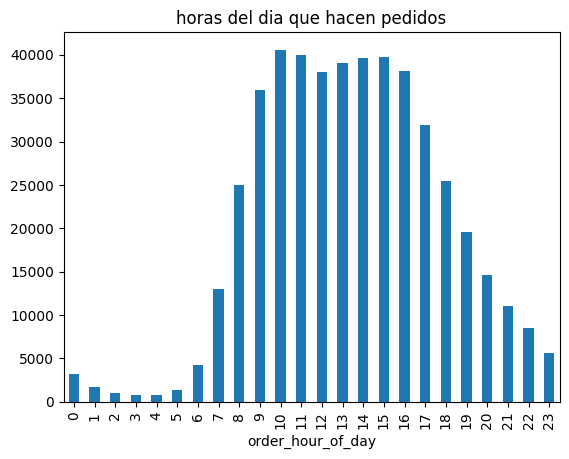

In [31]:
instacart_orders.groupby("order_hour_of_day")["user_id"].count().plot(kind="bar",title="horas del dia que hacen pedidos")
plt.show()

7.3  [A3] ¿Qué día de la semana compran víveres las personas?

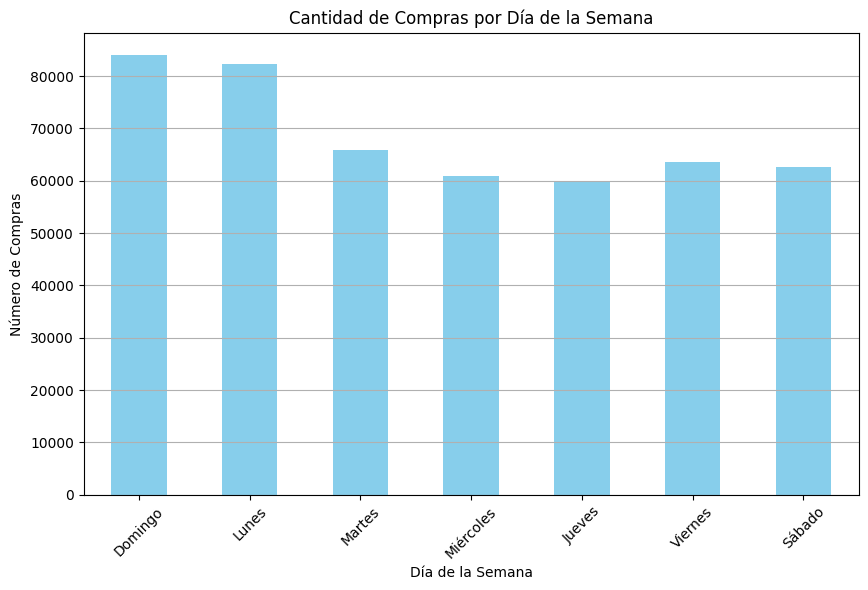

In [32]:
order_counts = instacart_orders['order_dow'].value_counts().sort_index()

# Mapeo de números a días de la semana
days_of_week = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
order_counts.index = days_of_week

# Graficar la cantidad de pedidos por día de la semana
plt.figure(figsize=(10, 6))
order_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Compras por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.grid(axis='y')
plt.show()

7.4  [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos

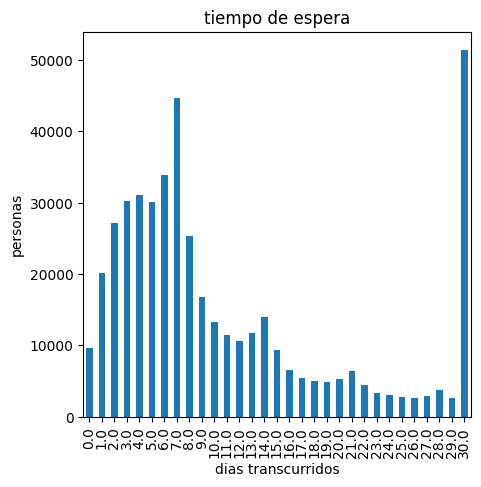

days_since_prior_order
0.0     206208
1.0     206207
2.0     206206
3.0     206193
4.0     206208
5.0     206208
6.0     206206
7.0     206209
8.0     206207
9.0     206208
10.0    206187
11.0    206200
12.0    206199
13.0    206154
14.0    206206
15.0    206174
16.0    206187
17.0    206159
18.0    206178
19.0    206201
20.0    206098
21.0    206199
22.0    206189
23.0    206202
24.0    206131
25.0    206196
26.0    206198
27.0    206172
28.0    206140
29.0    206106
30.0    206209
Name: user_id, dtype: int64

In [33]:
instacart_orders.groupby("days_since_prior_order")["user_id"].count().plot(kind='bar',title="tiempo de espera",figsize=[5, 5],xlabel="dias transcurridos",ylabel='personas')
plt.show()
instacart_orders.groupby("days_since_prior_order")["user_id"].min()
instacart_orders.groupby("days_since_prior_order")["user_id"].max()


[B] Intermedio (deben completarse todos para aprobar)

    ¿Existe alguna diferencia entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados? Traza gráficos de barra de 'order_hour_of_day' para ambos días en la misma figura y describe las diferencias que observes.
    Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
    ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?



7.5  [B1] Diferencia entre miércoles y sábados para 'order_hour_of_day'. Traza gráficos de barra para los dos días y describe las diferencias que veas.

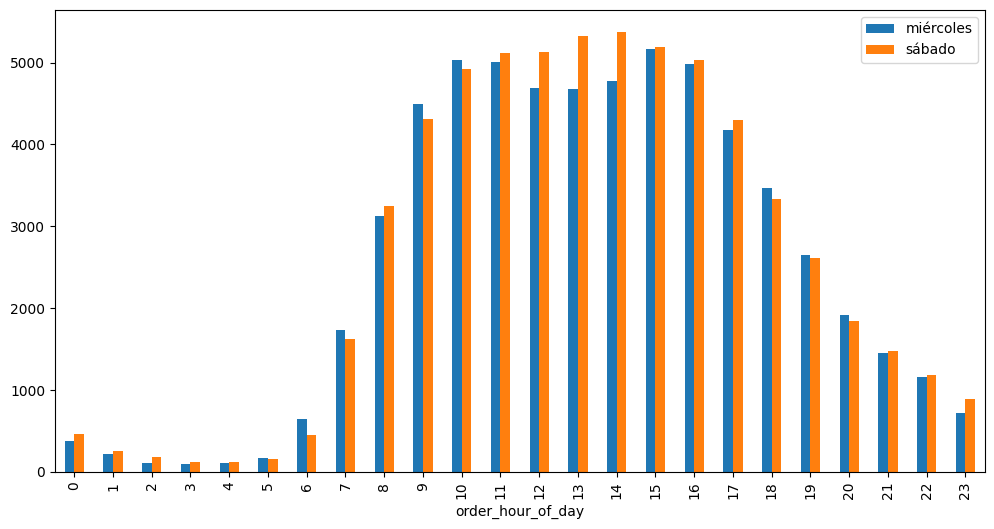

In [34]:
wednesdays = instacart_orders[instacart_orders['order_dow'] == 3]
saturdays = instacart_orders[instacart_orders['order_dow'] == 6] 
wednesday_counts = wednesdays['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturdays['order_hour_of_day'].value_counts().sort_index()
counts_df= pd.DataFrame({
    'miércoles': wednesday_counts,
    'sábado': saturday_counts
}).fillna(0)
counts_df.plot(kind='bar', figsize=(12, 6))
plt.show()

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

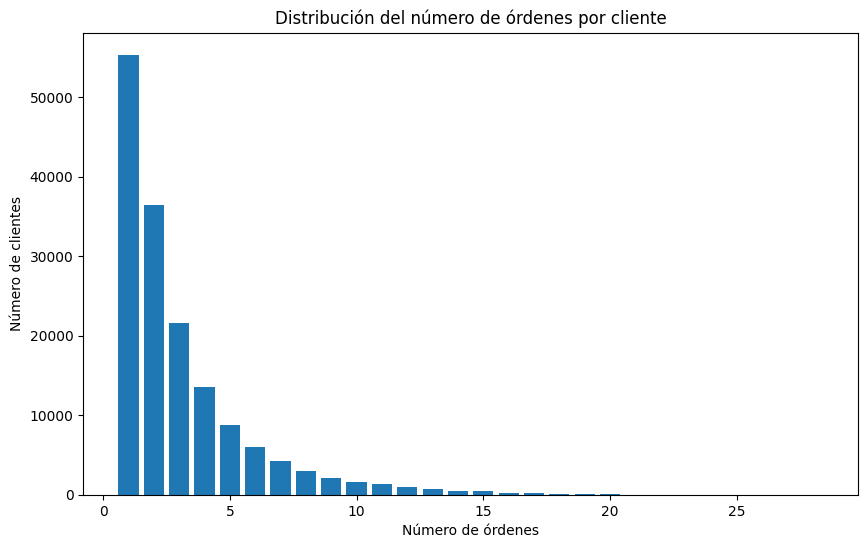

In [35]:
ordenes_por_cliente = instacart_orders.groupby('user_id')['order_number'].count()
distribucion = ordenes_por_cliente.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(distribucion.index, distribucion.values)
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de órdenes por cliente')
plt.show()

7.7  [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

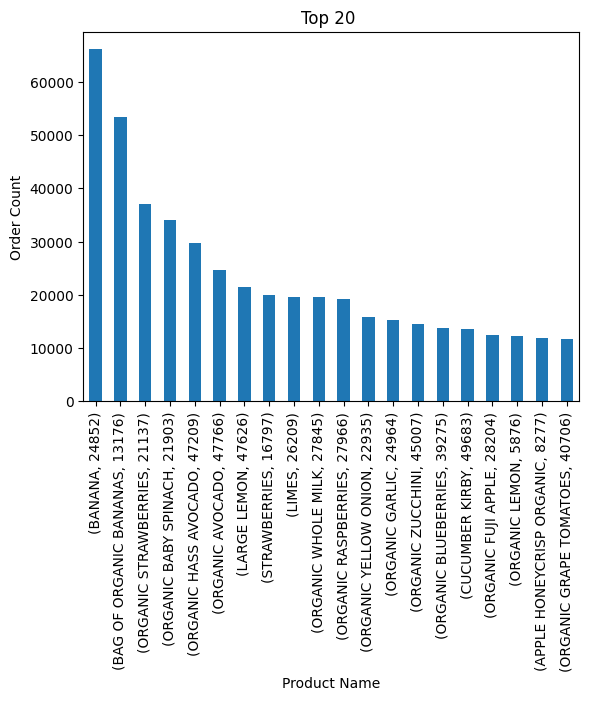

In [36]:
merged_product= order_products.merge(products, on='product_id')
product_counts = merged_product[['product_name','product_id']].value_counts()
top_20_products = product_counts.head(20)
top_20_products.plot(kind='bar')
plt.title('Top 20 ')
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.show()

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

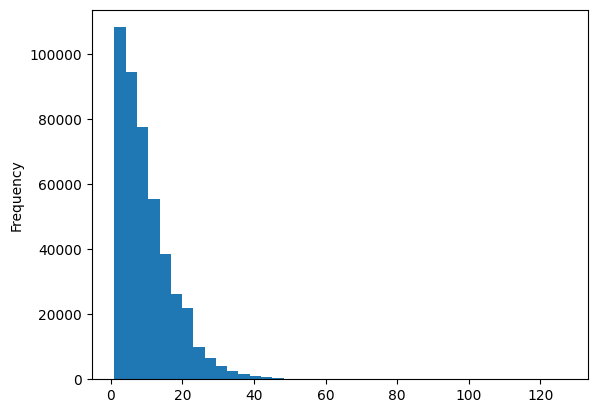

In [37]:
order_products.groupby("order_id")["product_id"].count().plot(kind='hist',bins=40)
plt.show()

7.9  [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

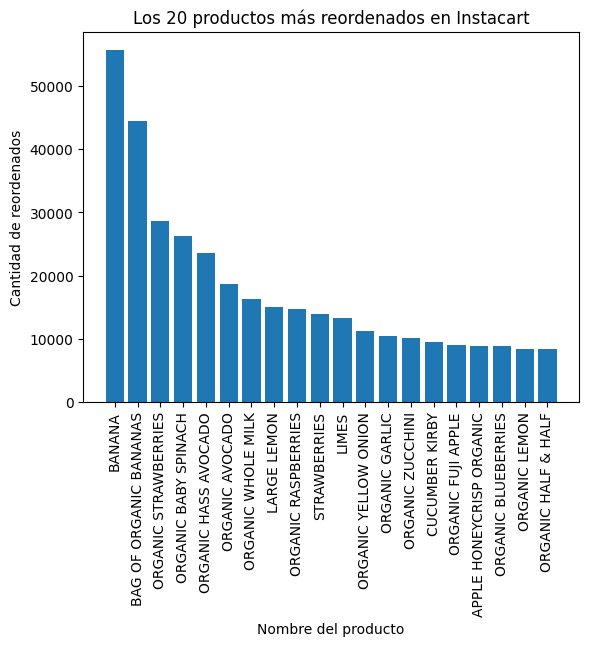

In [38]:
reordered_products = order_products[order_products['reordered'] == 1]
merged_product=reordered_products.merge(products, on='product_id')
product_counts =merged_product['product_name'].value_counts()
top_20_reordered = product_counts.head(20)
top_20_product_ids =merged_product [merged_product['product_name'].isin(top_20_reordered.index)]['product_id'].unique()
results = pd.DataFrame({'product_id': top_20_product_ids, 'product_name': top_20_reordered.index, 'reorder_count': top_20_reordered.values})

plt.bar(results['product_name'], results['reorder_count'])
plt.title('Los 20 productos más reordenados en Instacart')
plt.xlabel('Nombre del producto')
plt.ylabel('Cantidad de reordenados')
plt.xticks(rotation=90) 
plt.show()


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

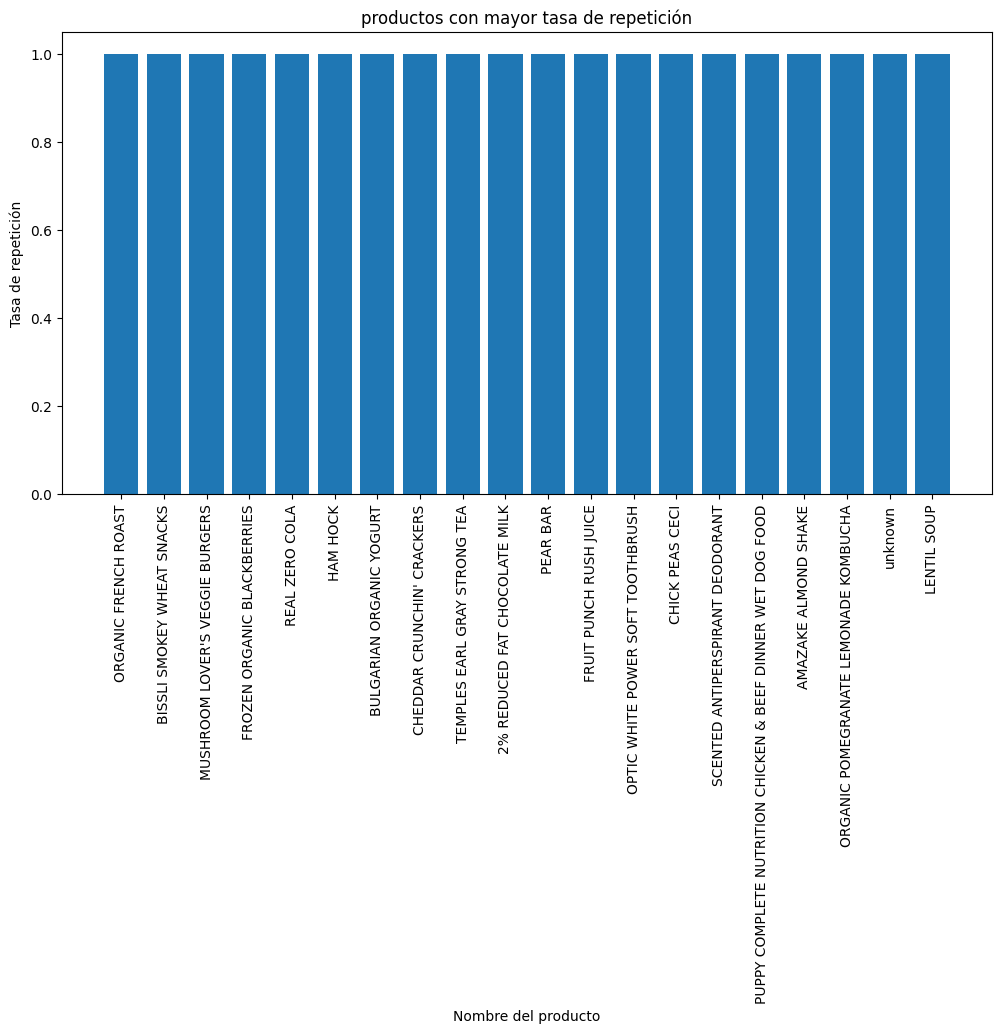

In [39]:
merged_df = order_products.merge(products, on='product_id')
product_stats = merged_df.groupby('product_id').agg({'reordered': ['sum', 'count']})
product_stats.columns = ['total_reordered', 'total_orders']
product_stats['repeat_rate'] = product_stats['total_reordered'] / product_stats.total_orders
product_stats = product_stats.merge(products[['product_id', 'product_name']], on='product_id')
product_stats = product_stats.sort_values('repeat_rate', ascending=False)
product_total=product_stats.head(20)


plt.figure(figsize=(12, 6))
plt.bar(product_total['product_name'],product_total ['repeat_rate'])
plt.title('productos con mayor tasa de repetición')
plt.xlabel('Nombre del producto')
plt.ylabel('Tasa de repetición')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

         total_reordered  total_products  repeat_rate
user_id                                              
2                      1              25     0.040000
4                      0               2     0.000000
5                      8              12     0.666667
6                      0               4     0.000000
7                     13              13     1.000000
...                  ...             ...          ...
206203                 6              27     0.222222
206206                15              17     0.882353
206207                41              33     1.242424
206208                87              80     1.087500
206209                 8              25     0.320000

[149626 rows x 3 columns]


<Axes: title={'center': 'distribucion de las tasas de reorden de los usuarios'}, xlabel='reorden de usuario', ylabel='Frequency'>

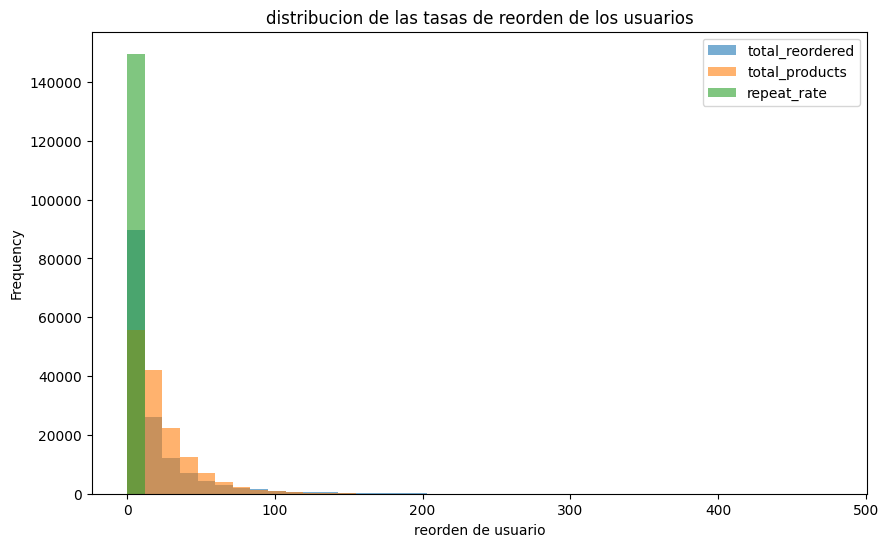

In [40]:
merged_df = order_products.merge(instacart_orders, on='order_id')

user_product_counts = merged_df.groupby(['user_id','product_id'])['reordered'].sum().reset_index()

user_repeat_rate = user_product_counts.groupby('user_id').agg({'reordered': ['sum', 'count']})

user_repeat_rate.columns = ['total_reordered', 'total_products']

user_repeat_rate['repeat_rate'] = user_repeat_rate['total_reordered'] / user_repeat_rate['total_products']

print(user_repeat_rate)

user_repeat_rate.plot(kind="hist",figsize=(10, 6),bins=40,alpha=0.6,xlabel="reorden de usuario",title="distribucion de las tasas de reorden de los usuarios")
                     

7.12  [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

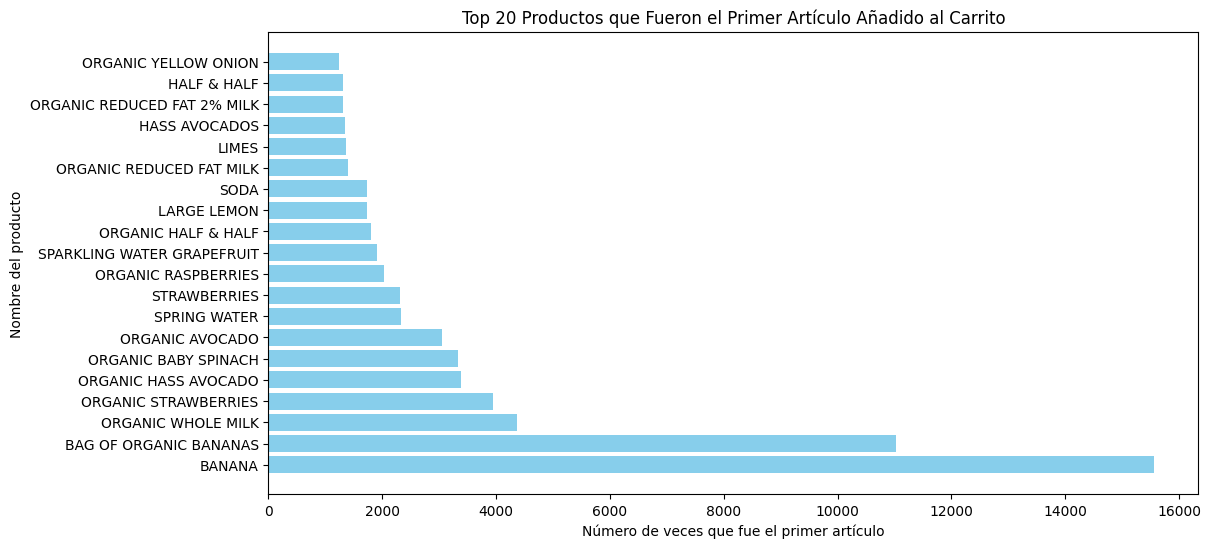

In [41]:
first_items = order_products[order_products['add_to_cart_order'] == 1]

first_item_counts = first_items['product_id'].value_counts().reset_index()
first_item_counts.columns = ['product_id', 'first_item_count']

first_item_counts = first_item_counts.merge(products[['product_id', 'product_name']], on='product_id')
top_20_first_items = first_item_counts.head(20)


plt.figure(figsize=(12, 6))
plt.barh(top_20_first_items['product_name'], top_20_first_items['first_item_count'], color='skyblue')
plt.xlabel('Número de veces que fue el primer artículo')
plt.ylabel('Nombre del producto')
plt.title('Top 20 Productos que Fueron el Primer Artículo Añadido al Carrito')
plt.show()

los archivos de datos necesarios para poder conocer su informacion y comenzar con el procesamiento de datos en el cual se verifico y se corrigio los tipos de datos, se identifico los archivos con valores duplicados en la tabla instacart_order, y se eliminaron,  se observaron valores ausentes identificados en la tablas products, (product_name) y se completaron los nombres ausentes con uknown en el caso de order_products se lleno con el numero 999 una vez los datos limpios y procesados se hizo el analisis en donde atraves de las graficas llegamos ala conclusion que la hora que mas personas hacen pedidos es alas 10:AM  mientras que la hora con menos pedido es alas 3 y 4 AM , las personas prefieren comprar su viveres el dia domingo seguido del dia lunes,mas de 50000 personas esperan mas de un mes para hacer otro pedido,de 11 am a 4 pm es donde mas ordenes en el dia hay para sabado y miercoles ,el  dia sabado hay una mayor pedido que el miercoles de 1 a 2 de la tarde es el punto mas alto,los usuarios prefieren pedir de 1 a 5 ordenes,los 20 productos mas pedidos por los clientes son banana,organic banana,organic strawberries,baby spinach,organic hass,organic avocado,large lemon,strawberries,limes,organic milk, organic rasberry,organic onion,organic garlic, organic zuchinni, organic blueberries, cucumber kirby,organic,fuji,apple honey ,organic grape siendo el mas pedido la bvanana y el menos pedido organic grape tomatoes,en cuestion de articulos los usuarios prefieren comprar articulos por menudeo pocas o unicas piezas siendo las que mas frecuencia tienen,los productos que se vuelven a pedir son banana organic banana organic strawberries,baby spinach,organic hass, organic avocado,organic milk,large lemon, strawberries,limes,organic.yellow,organic garlic,organic zuchhini, cucumber kirby,organic fuji, apple honey,organic blueberries,organic lemon , organic half,el primer producto que mas veces fue primero puesto en el carrito es la banana con mas 15000 personas mientras que organic yellow onion fue el utimo con menos de 2000 personas en conclusion los usuarios prefieren comprar una o piezas limitadas de un articulo preferentemente el dia domingo entre las 10 am y 11am  siendo la bananna el articulo mas popular entre los usuarios 